# analyzing the effect of screening by neighbors on attraction
Tim Tyree<br>
10.27.2021

In [1]:
from lib.my_initialization import *
# import scipy
# from scipy import stats
%load_ext autoreload
%autoreload 2

In [17]:
#TODO(later): restrict to only the settings with a particular positive D==0.5


In [18]:
#neighbors=0
input_fn_star=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_ar_star.csv"
df=pd.read_csv(input_fn_star)
#map columns of star df to df
df['varkappa']=df['astar']
df['r']=df['rstar']
df['model_name_full']=df['model_name']
df['rkp']=1/2*np.pi*df['r']**2*df['kappa']
df0=df.copy()

#neighbors=1
input_fn_star=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_19_ar_star.csv"
df=pd.read_csv(input_fn_star)
#map columns of star df to df
df['varkappa']=df['astar']
df['r']=df['rstar']
df['model_name_full']=df['model_name']
df['rkp']=1/2*np.pi*df['r']**2*df['kappa']
df1=df.copy()

assert not df0.isnull().any().any()
assert not df1.isnull().any().any()

In [23]:
#compute xy values
df=df0.copy()
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0
x_values_fk0=df.loc[boofk,'rkp'].values
y_values_fk0=df.loc[boofk,'astar'].values
x_values_lr0=df.loc[boolr,'rkp'].values
y_values_lr0=df.loc[boolr,'astar'].values


#compute xy values
df=df1.copy()
#slice data
boofk=df['model_name_full']=='fk_pbc'
boolr=df['model_name_full']=='lr_pbc'
#restrict to only the settings with positive D
boofk&=df['D']>0
boolr&=df['D']>0

x_values_fk1=df.loc[boofk,'rkp'].values
y_values_fk1=df.loc[boofk,'astar'].values
x_values_lr1=df.loc[boolr,'rkp'].values
y_values_lr1=df.loc[boolr,'astar'].values

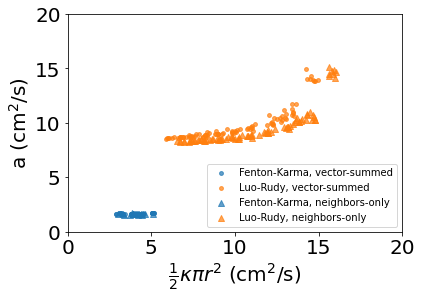

In [52]:
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(x_values_fk0,y_values_fk0,c='C0',alpha=0.7,s=15,label='Fenton-Karma, vector-summed')
ax.scatter(x_values_lr0,y_values_lr0,c='C1',alpha=0.7,s=15,label='Luo-Rudy, vector-summed')
ax.scatter(x_values_fk1,y_values_fk1,c='C0',marker='^',alpha=0.7,label='Fenton-Karma, neighbors-only')
ax.scatter(x_values_lr1,y_values_lr1,c='C1',marker='^',alpha=0.7,label='Luo-Rudy, neighbors-only')
format_plot(ax=ax,xlabel=r"$\frac{1}{2}\kappa \pi r^2$ (cm$^2$/s)",ylabel=r"a (cm$^2$/s)")#,use_loglog=True)
ax.set_xlim((0,20))
ax.set_ylim((0,20))
ax.legend(fontsize=10,loc='lower right')
plt.show()

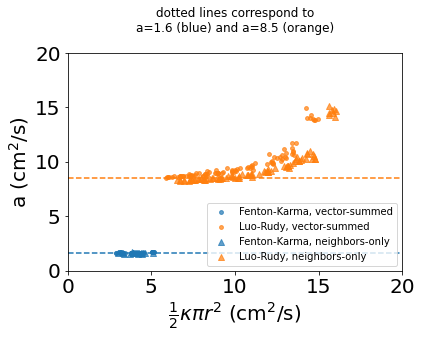

In [73]:
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(x_values_fk0,y_values_fk0,c='C0',alpha=0.7,s=15,label='Fenton-Karma, vector-summed')
ax.scatter(x_values_lr0,y_values_lr0,c='C1',alpha=0.7,s=15,label='Luo-Rudy, vector-summed')
ax.scatter(x_values_fk1,y_values_fk1,c='C0',marker='^',alpha=0.7,label='Fenton-Karma, neighbors-only')
ax.scatter(x_values_lr1,y_values_lr1,c='C1',marker='^',alpha=0.7,label='Luo-Rudy, neighbors-only')
format_plot(ax=ax,xlabel=r"$\frac{1}{2}\kappa \pi r^2$ (cm$^2$/s)",ylabel=r"a (cm$^2$/s)")#,use_loglog=True)

#add dotted lines with visually reasonable estimates for a
xv=np.arange(0,20,0.1)
ax.plot(xv,0.*xv+1.6,'C0--')
ax.plot(xv,0.*xv+8.5,'C1--')

ax.set_xlim((0,20))
ax.set_ylim((0,20))
ax.legend(fontsize=10,loc='lower right')
ax.set_title(f"dotted lines correspond to\na=1.6 (blue) and a=8.5 (orange)\n")
plt.show()

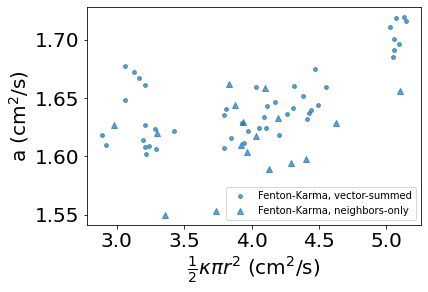

In [66]:
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(x_values_fk0,y_values_fk0,c='C0',alpha=0.7,s=15,label='Fenton-Karma, vector-summed')
# ax.scatter(x_values_lr0,y_values_lr0,c='C1',alpha=0.7,s=15,label='Luo-Rudy, vector-summed')
ax.scatter(x_values_fk1,y_values_fk1,c='C0',marker='^',alpha=0.7,label='Fenton-Karma, neighbors-only')
# ax.scatter(x_values_lr1,y_values_lr1,c='C1',marker='^',alpha=0.7,label='Luo-Rudy, neighbors-only')
format_plot(ax=ax,xlabel=r"$\frac{1}{2}\kappa \pi r^2$ (cm$^2$/s)",ylabel=r"a (cm$^2$/s)")#,use_loglog=True)

#add dotted lines with visually reasonable estimates for a
xv=np.arange(0,20,0.1)
# ax.plot(xv,0.*xv+1.5,'C0--')
# ax.plot(xv,0.*xv+8.5,'C1--')

# ax.set_xlim((0,20))
# ax.set_ylim((0,20))
ax.legend(fontsize=10,loc='lower right')
# ax.set_title(f"dotted lines correspond to\na=1.5 (blue) and a=8.5 (orange)\n")
plt.show()

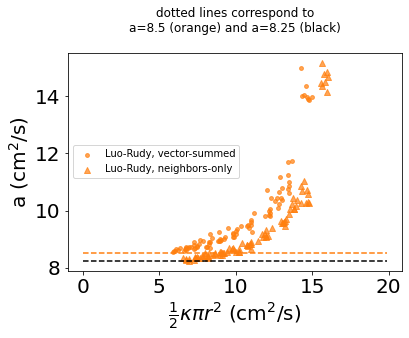

In [72]:
fig,ax=plt.subplots(figsize=(6,4))
# ax.scatter(x_values_fk0,y_values_fk0,c='C0',alpha=0.7,s=15,label='Fenton-Karma, vector-summed')
ax.scatter(x_values_lr0,y_values_lr0,c='C1',alpha=0.7,s=15,label='Luo-Rudy, vector-summed')
# ax.scatter(x_values_fk1,y_values_fk1,c='C0',marker='^',alpha=0.7,label='Fenton-Karma, neighbors-only')
ax.scatter(x_values_lr1,y_values_lr1,c='C1',marker='^',alpha=0.7,label='Luo-Rudy, neighbors-only')
format_plot(ax=ax,xlabel=r"$\frac{1}{2}\kappa \pi r^2$ (cm$^2$/s)",ylabel=r"a (cm$^2$/s)")#,use_loglog=True)

#add dotted lines with visually reasonable estimates for a
xv=np.arange(0,20,0.1)
ax.plot(xv,0.*xv+8.25,'k--')
ax.plot(xv,0.*xv+8.5,'C1--')

# ax.set_xlim((0,20))
# ax.set_ylim((0,20))
ax.legend(fontsize=10,loc='center left')
ax.set_title(f"dotted lines correspond to\na=8.5 (orange) and a=8.25 (black)\n")
plt.show()